# Blur Bundle

This bundle applies a blur to an input 2D image. This is used for demonstrating streaming concepts using MONAI inference without needing an actual trained network with weights. Many of the typical concepts from actual bundles are illustrated here.

First thing to do is generate a test image using GStreamer:

In [ ]:
import gi

gi.require_version("Gst", "1.0")
from gi.repository import Gst

Gst.init([])

pipeline = Gst.parse_launch(
    'videotestsrc num-buffers=1 ! video/x-raw,width=1280,height=720 ! jpegenc ! multifilesink location="../../../img_%06d.jpg"'
)

pipeline.set_state(Gst.State.PLAYING)

This can then be visualised:

(720, 1280, 3) uint8


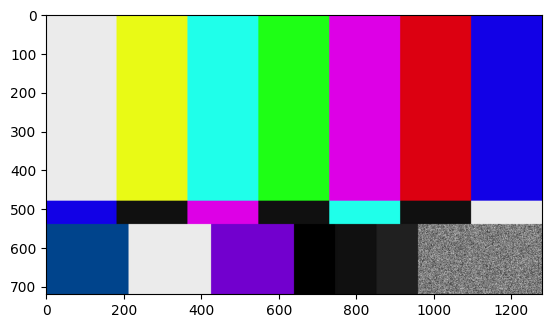

In [ ]:
import matplotlib.pyplot as plt

im = plt.imread("../../../img_000000.jpg")
print(im.shape, im.dtype)
plt.imshow(im)

Load the bundle and apply inference to the image:

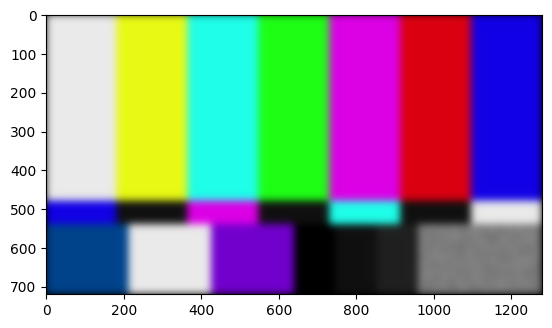

In [9]:
import os
from monai.bundle import ConfigParser

bundle_root = os.path.abspath("..")

cp = ConfigParser()
cp.read_meta(bundle_root + "/configs/metadata.json")
cp.read_config([bundle_root + "/configs/inference.json"])
cp["bundle_root"] = bundle_root

dataset = cp.get_parsed_content("dataset")
dataset.data.append(im.copy())

evaluator = cp.get_parsed_content("evaluator")

evaluator.run()

pred = evaluator.state.output[0]["pred"].detach().cpu().numpy()
plt.imshow(pred)